# Conceptual


### 1. Using basic statistical properties of the variance, as well as singlevariable calculus, derive (5.6). In other words, prove that $\alpha$ given by (5.6) does indeed minimize $\text{Var}(\alpha X + (1 - \alpha) Y) $.  

(5.6)
$$
\alpha = \frac{\sigma^2_Y - \sigma_{XY}}{\sigma^2_X + \sigma^2_Y - 2\sigma_{XY}}
$$

The variance of a sum of two random variables is given by:
$$
\text{Var}(aX + bY) = a^2\text{Var}(X) + b^2\text{Var}(Y) + 2ab \, \text{Cov}(X, Y)
$$

Applying this to our variance:
$$
\text{Var}(\alpha X + (1 - \alpha) Y) = \alpha^2\text{Var}(X) + (1 - \alpha)^2\text{Var}(Y) + 2\alpha(1 - \alpha) \, \text{Cov}(X, Y)
$$

<br>

$$
\alpha^2\text{Var}(X) + (1 - \alpha)^2\text{Var}(Y) + 2\alpha(1 - \alpha) \, \text{Cov}(X, Y) =
\alpha^2 \sigma_X^2 + (1 - \alpha)^2 \sigma_Y^2 + 2 \alpha (1 - \alpha) \sigma_{XY}
$$

<br>

If we want to minimize the above equation we have to take derivative of it with respecto to $\alpha$ and equal it to zero.

$$
\frac{d}{d\alpha} \left(\alpha^2 \sigma_X^2 + (1 - \alpha)^2 \sigma_Y^2 + 2 \alpha (1 - \alpha) \sigma_{XY}\right) = 
2\alpha \sigma_X^2 -2\sigma_Y^2 + 2\alpha \sigma_Y^2 + 2\sigma_{XY} - 4\alpha\sigma_{XY}
$$

<br>

$$
2\alpha \sigma_X^2 -2\sigma_Y^2 + 2\alpha \sigma_Y^2 + 2\sigma_{XY} - 4\alpha\sigma_{XY} = 0 \quad \Rightarrow \quad
2\alpha \sigma_X^2 + 2\alpha \sigma_Y^2 - 4\alpha\sigma_{XY} = 2\sigma_Y^2 - 2\sigma_{XY}
$$

$$
\alpha = \frac{\sigma^2_Y - \sigma_{XY}}{\sigma^2_X + \sigma^2_Y - 2\sigma_{XY}}
$$


### 2. We will now derive the probability that a given observation is part of a bootstrap sample. Suppose that we obtain a bootstrap sample from a set of n observations.
(a) What is the probability that the first bootstrap observation is
not the $j$-th observation from the original sample? Justify your
answer.  

- There are $n$ total observations, and the probability of selecting the $j$-th observation is $\frac{1}{n}$, so the probability of not selecting it is $1 - \frac{1}{n}$

(b) What is the probability that the second bootstrap observation
is not the $j$-th observation from the original sample?  

- The second bootstrap observation is chosen independently from the first, so the probability that the second bootstrap observation is not the $j$-th observation is also: $ 1 - \frac{1}{n} $

(c) Argue that the probability that the $j$-th observation is not in the
bootstrap sample is $ \left(1 - \frac{1}{n}\right)^n $  

- Each observation is selected independently with probability $1 - \frac{1}{n}$ of not being chosen. Since we are making $n$ selections in total, the probability that the $j$-th observation is not selected in any of the $n$ draws is the product of individual probabilities, which gives:  
$$ \left(1 - \frac{1}{n}\right)^n $$

(d) When n = 5, what is the probability that the jth observation is
in the bootstrap sample?  

- Probability of not beeing in bootstrap sample has already been given by: $$ \left(1 - \frac{1}{5}\right)^5 = \left(\frac{4}{5}\right)^5 \approx 0.32768. $$  
Therefore, the probability that the $j$-th observation is in the bootstrap sample is:  
$$  1 - 0.32768 = 0.67232. $$

(e) When n = 100, what is the probability that the jth observation
is in the bootstrap sample?  

$$ 1 - \left(1 - \frac{1}{100}\right)^{100} \approx 0.634 $$

(f) When n = 10, 000, what is the probability that the jth observation is in the bootstrap sample?  

$$ 1 - \left(1 - \frac{1}{10000}\right)^{10000} \approx 0.6321 $$

(g) Create a plot that displays, for each integer value of n from 1 to 100, 000, the probability that the jth observation is in the bootstrap sample. Comment on what you observe.  

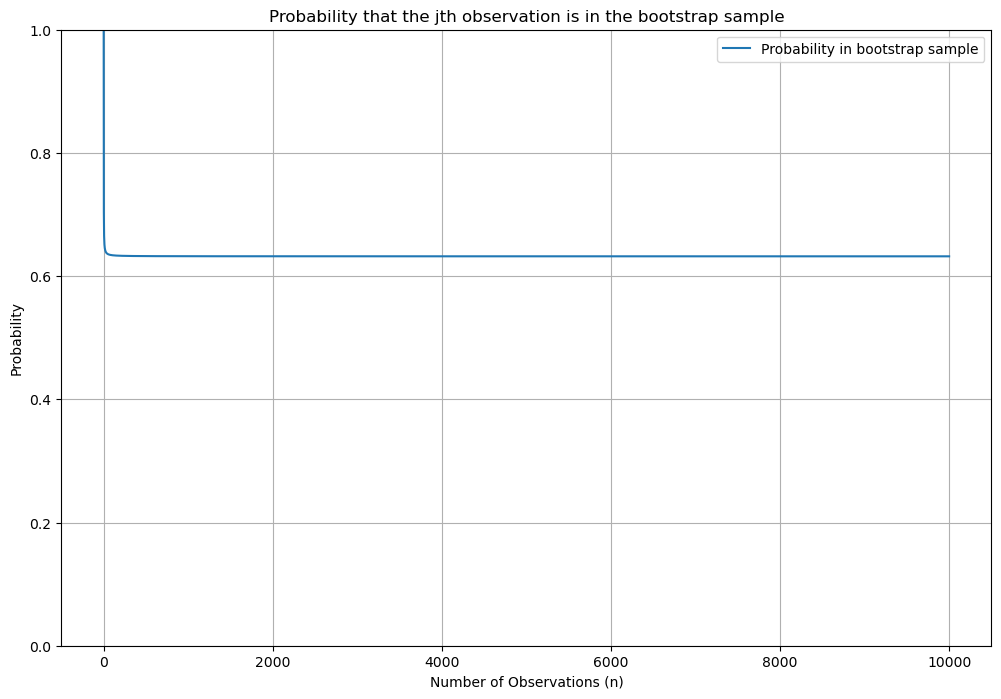

In [2]:
import numpy as np
import matplotlib.pyplot as plt

n_values = np.arange(1, 10001)

prob_in_bootstrap = 1 - (1 - 1 / n_values) ** n_values

plt.figure(figsize=(12, 8))
plt.plot(n_values, prob_in_bootstrap, label='Probability in bootstrap sample')
plt.title('Probability that the jth observation is in the bootstrap sample')
plt.xlabel('Number of Observations (n)')
plt.ylim([0, 1])
plt.ylabel('Probability')
plt.grid()
plt.legend()
plt.show()

# Probability very quickly converges to the value of aproximately 0.632

(h) We will now investigate numerically the probability that a bootstrap sample of size n = 100 contains the jth observation. Here
j = 4. We first create an array store with values that will subsequently be overwritten using the function np.empty(). We then 
repeatedly create bootstrap samples, and each time we record whether or not the fifth observation is contained in the bootstrap
sample.

In [3]:
rng = np.random.default_rng(10)
store = np.empty(10000)
for i in range(10000):
  store[i] = np.sum(rng.choice(100, size=100, replace=True) == 4) > 0
  
np.mean(store) 

# Again we get the same value

0.6362

### 3. We now review k-fold cross-validation.
(a) Explain how k-fold cross-validation is implemented.  
- Split data into k equal-sized folds
- For each fold:
    - Hold out the fold as the validation set.
    - Train the modle on the remaining k-1 folds.
    - Evaluate the model on the validation fold.
- Average performance across all k folds to get a final estimate.

(b) What are the advantages and disadvantages of k-fold cross-validation relative to:  

i. The validation set approach?
- Advantages of k-fold:
    - Every data point is used for both training and validation.
    - Gives more reliable estimate due to averaging results from all k folds.  

- Disadvantages of k-fold:
    - More computationally expensive.

ii. LOOCV?
- Advatages of k-fold:
    - Less computationally expensive.
    - K-fold cross-validation produces estimates with lower variance.

- Disadvantages of k-fold:
    - Higher bias may sometimes be a problem.

### 4. Suppose that we use some statistical learning method to make a prediction for the response Y for a particular value of the predictor X. Carefully describe how we might estimate the standard deviation of our prediction.

- Create B bootstrap samples from the data 
- For each bootstrap sample, train the model and make predictions on the observations not included in the bootstrap sample.
- Compute the standard deviation of these predictions.


# Applied

In [4]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from ISLP import load_data
from ISLP.models import (ModelSpec as MS, summarize, poly)
from sklearn.model_selection import train_test_split
from functools import partial
from sklearn.model_selection import (cross_validate, KFold, ShuffleSplit)
from sklearn.base import clone
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import PolynomialFeatures
from ISLP.models import sklearn_sm

### 5. In Chapter 4, we used logistic regression to predict the probability of default using income and balance on the Default data set. We will now estimate the test error of this logistic regression model using the validation set approach. Do not forget to set a random seed before beginning your analysis.  
(a) Fit a logistic regression model that uses income and balance to
predict default.

In [5]:
default_df = load_data('Default')
default_df.head()

,default,student,balance,income
0,No,No,729.526495,44361.625074
1,No,Yes,817.180407,12106.134700
2,No,No,1073.549164,31767.138947
3,No,No,529.250605,35704.493935
4,No,No,785.655883,38463.495879


In [6]:
default_df['default'] = default_df['default'].astype('category')
default_df['default01'] = default_df['default'].cat.rename_categories({'No': 0, 'Yes': 1})
default_df['student01'] = default_df['student'].astype('category').cat.rename_categories({'No': 0, 'Yes': 1})


y = default_df['default01']
X = default_df[['income', 'balance']]

X = sm.add_constant(X)

log_default = sm.GLM(y,
                     X,
                     family=sm.families.Binomial())

results = log_default.fit()
summarize(results)


,coef,std err,z,P>|z|
const,-11.540500,0.435000,-26.544,0.0
income,0.000021,0.000005,4.174,0.0
balance,0.005600,0.000000,24.835,0.0


(b) Using the validation set approach, estimate the test error of this
model. In order to do this, you must perform the following steps:  

i. Split the sample set into a training set and a validation set.
  
ii. Fit a multiple logistic regression model using only the training observations.
  
iii. Obtain a prediction of default status for each individual in
the validation set by computing the posterior probability of
default for that individual, and classifying the individual to
the default category if the posterior probability is greater
than 0.5.
  
iv. Compute the validation set error, which is the fraction of
the observations in the validation set that are misclassifed.


In [7]:
def validation_set_method(df, n_splits):

  errors = []
  for i in range(n_splits):
    train_data, val_data = train_test_split(df, test_size=0.3, random_state=i)

    train_X = train_data[['income', 'balance']]
    train_y = train_data['default01']

    val_X = val_data[['income', 'balance']]
    val_y = val_data['default01'].astype('int')

    log_default = sm.GLM(train_y,
                        train_X,
                        family=sm.families.Binomial())

    log_results = log_default.fit()
    val_pred = log_results.predict(val_X)

    val_pred = (val_pred > 0.5).astype('int')
    acc = np.sum(val_pred == val_y) / (len(val_y))
    err = 1 - acc

    errors.append(err)

    print('Validation set number: {0} error: {1:.4f}'.format(i + 1, err))

  return errors

_ = validation_set_method(default_df, 1)


Validation set number: 1 error: 0.0380


(c) Repeat the process in (b) three times, using three diferent splits
of the observations into a training set and a validation set. Comment on the results obtained.

In [8]:
_ = validation_set_method(default_df, 3)

Validation set number: 1 error: 0.0380
Validation set number: 2 error: 0.0303
Validation set number: 3 error: 0.0260


(d) Now consider a logistic regression model that predicts the probability of default using income, balance, and a dummy variable
for student. Estimate the test error for this model using the validation set approach. Comment on whether or not including a
dummy variable for student leads to a reduction in the test error rate.

In [9]:
def validation_set_method_dummy(df, n_splits):

  errors = []
  for i in range(n_splits):
    train_data, val_data = train_test_split(df, test_size=0.3, random_state=i)

    train_X = train_data[['income', 'balance', 'student01']]
    train_y = train_data['default01']

    val_X = val_data[['income', 'balance', 'student01']]
    val_y = val_data['default01'].astype('int')

    log_default = sm.GLM(train_y,
                        train_X,
                        family=sm.families.Binomial())

    log_results = log_default.fit()
    val_pred = log_results.predict(val_X)

    val_pred = (val_pred > 0.5).astype('int')
    acc = np.sum(val_pred == val_y) / (len(val_y))
    err = 1 - acc

    errors.append(err)

    print('Validation set number: {0} error: {1:.4f}'.format(i + 1, err))

  return errors

_ = validation_set_method_dummy(default_df, 1)

Validation set number: 1 error: 0.0407


In [10]:
_ = validation_set_method_dummy(default_df, 3)

# Validation set method error is higher for model with dummy variable

Validation set number: 1 error: 0.0407
Validation set number: 2 error: 0.0367
Validation set number: 3 error: 0.0277


### 6. We continue to consider the use of a logistic regression model to predict the probability of default using income and balance on the Default data set. In particular, we will now compute estimates for the standard errors of the income and balance logistic regression coefcients in two diferent ways: (1) using the bootstrap, and (2) using the standard formula for computing the standard errors in the sm.GLM() function. Do not forget to set a random seed before beginning your analysis.  

(a) Using the summarize() and sm.GLM() functions, determine the
estimated standard errors for the coefcients associated with
income and balance in a multiple logistic regression model that
uses both predictors.


In [11]:
summarize(results)

,coef,std err,z,P>|z|
const,-11.540500,0.435000,-26.544,0.0
income,0.000021,0.000005,4.174,0.0
balance,0.005600,0.000000,24.835,0.0


(b) Write a function, boot_fn(), that takes as input the Default data
set as well as an index of the observations, and that outputs
the coefcient estimates for income and balance in the multiple
logistic regression model.

In [12]:
def boot_fn(default_df, idx):

  bootstrap_sample = default_df.iloc[idx]

  y = bootstrap_sample['default01']
  X = bootstrap_sample[['income', 'balance']]

  X = sm.add_constant(X)

  log_default = sm.GLM(y,
                      X,
                      family=sm.families.Binomial())

  results = log_default.fit()

  return results.params[['income', 'balance']]

(c) Following the bootstrap example in the lab, use your boot_fn()
function to estimate the standard errors of the logistic regression
coefcients for income and balance.

In [13]:
rng = np.random.default_rng(42)
for _ in range(5):
    indices = rng.choice(len(default_df), len(default_df), replace=True)
    print(indices)  
    print(boot_fn(default_df, indices))


[ 892 7739 6545 ... 3531 5655 6152]
income     0.000030
balance    0.005869
dtype: float64
[3386 2181 5203 ... 3734 3567 4809]
income     0.000018
balance    0.005590
dtype: float64
[ 341 7207 2139 ... 3037 7410 8570]
income     0.000026
balance    0.006119
dtype: float64
[2317 3475 8608 ... 6708  396 1412]
income     0.000017
balance    0.005792
dtype: float64
[9001 7407 2069 ... 1605 3100 6398]
income     0.000015
balance    0.005486
dtype: float64


(d) Comment on the estimated standard errors obtained using the
sm.GLM() function and using the bootstrap.

In [14]:
bootstrap_estimates = np.zeros((1000, 2))

for i in range(1000):
    indices = np.random.choice(len(default_df), size=len(default_df), replace=True)
    
    bootstrap_estimates[i] = boot_fn(default_df, indices)

bootstrap_se = bootstrap_estimates.std(axis=0)
bootstrap_se_dict = {'income': bootstrap_se[0], 'balance': bootstrap_se[1]}
bootstrap_se_dict # bootstrap gives smaller standard error estimates


{'income': 4.861961298031585e-06, 'balance': 0.00022266395544494948}

### 7. In Sections 5.1.2 and 5.1.3, we saw that the cross_validate() function can be used in order to compute the LOOCV test error estimate. Alternatively, one could compute those quantities using just sm.GLM() and the predict() method of the fitted model within a for loop. You will now take this approach in order to compute the LOOCV error for a simple logistic regression model on the Weekly data set. Recall that in the context of classifcation problems, the LOOCV error is given in (5.4).

(5.4)
$$
\text{CV}_{(n)} = \frac{1}{n} \sum_{i=1}^{n}{\text{Err}_i}
$$

(a) Fit a logistic regression model that predicts Direction using Lag1
and Lag2.

In [15]:
smarket_df = load_data('Smarket')

X = smarket_df[['Lag1', 'Lag2']]
y = smarket_df['Direction'] == 'Up'

glm = sm.GLM(y,
             X,
             family=sm.families.Binomial())
results = glm.fit()


(b) Fit a logistic regression model that predicts Direction using Lag1
and Lag2 using all but the first observation.

In [16]:
X = smarket_df[['Lag1', 'Lag2']][1:]
y = smarket_df['Direction'][1:] == 'Up'

glm = sm.GLM(y,
             X,
             family=sm.families.Binomial())
results = glm.fit()

(c) Use the model from (b) to predict the direction of the first observation. You can do this by predicting that the frst observation
will go up if P(Direction = "Up"|Lag1, Lag2) > 0.5. Was this
observation correctly classifed?

In [17]:
X_test = smarket_df[['Lag1', 'Lag2']].iloc[[0]]
y_test = smarket_df['Direction'].iloc[0] == 'Up'

y_pred = results.predict(X_test)
y_pred == y_test



0    False
dtype: bool

(d) Write a for loop from i = 1 to i = n, where n is the number of
observations in the data set, that performs each of the following
steps:  

i. Fit a logistic regression model using all but the ith observation to predict Direction using Lag1 and Lag2.  

ii. Compute the posterior probability of the market moving up
for the ith observation.  

iii. Use the posterior probability for the ith observation in order
to predict whether or not the market moves up.  

iv. Determine whether or not an error was made in predicting 
the direction for the ith observation. If an error was made,
then indicate this as a 1, and otherwise indicate it as a 0.  

In [18]:
n = len(smarket_df)
error = []

for i in range(n):
  X_train = smarket_df[['Lag1', 'Lag2']].drop(i)
  y_train = smarket_df['Direction'].drop(i) == 'Up'
  X_test = smarket_df[['Lag1', 'Lag2']].iloc[i]
  y_test = smarket_df['Direction'].iloc[i] 

  glm = sm.GLM(y_train,
               X_train,
               family=sm.families.Binomial())
  results = glm.fit()

  y_pred = 'Up' if results.predict(X_test).iloc[0] > 0.5 else 'Down'
  error.append((y_test != y_pred))

(e) Take the average of the n numbers obtained in (d)iv in order to
obtain the LOOCV estimate for the test error. Comment on the
results.

In [19]:
np.mean(error)

# Test error estimates are slightly bellow 50%, it is expected for this kind of dataset where we analyze stock market which is higly unpredictable.

0.4776

### 8. We will now perform cross-validation on a simulated data set.
(a) Generate a simulated data set as follows:


In [20]:
rng = np.random.default_rng(1)
x = rng.normal(size=100)
y = x - 2 * x**2 + rng.normal(size=100)

In this data set, what is n and what is p? 
Write out the model used to generate the data in equation form.

- $n = 100$
- $p = 2$

- $ y = x - 2x^2 + \epsilon $


(b) Create a scatterplot of X against Y . Comment on what you find.

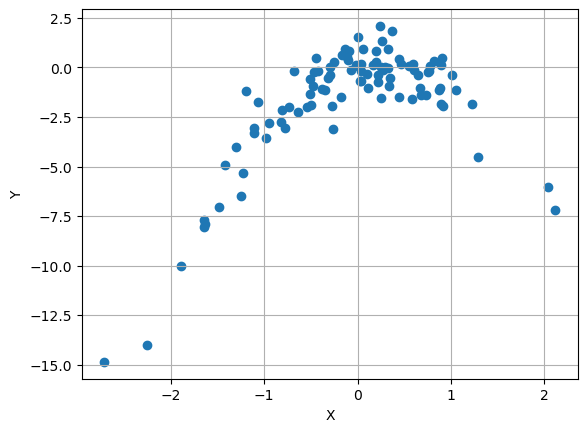

In [21]:
plt.scatter(x, y)
plt.xlabel('X')
plt.ylabel('Y')
plt.grid()

(c) Set a random seed, and then compute the LOOCV errors that
result from fitting the following four models using least squares:
- i. $Y = \beta_0 + \beta_1 X + \epsilon$
- ii. $Y = \beta_0 + \beta_1 X + \beta_2X^2 + \epsilon$
- iii. $Y = \beta_0 + \beta_1 X + \beta_2X^2 + \beta_3X^3 + \epsilon$
- iv. $Y = \beta_0 + \beta_1X + \beta_2X^2 + \beta_3X^3 + \beta_4X^4 + \epsilon$  

Note you may find it helpful to use the data.frame() function
to create a single data set containing both X and Y .

In [22]:
data = pd.DataFrame({'X': x, 'Y':y})

def loocv(data, degree):
  n = len(data)
  errors = []

  for i in range(n):
    train_data = data.drop(i)
    test_data = data.iloc[i]

    X_train = np.vander(np.array(train_data['X']), degree + 1, increasing=True)
    y_train = train_data['Y']

    X_test = np.vander(np.array([test_data['X']]), degree + 1, increasing=True)
    y_test = test_data['Y']

    X_train = sm.add_constant(X_train)
    X_test = sm.add_constant(X_test)

    ols_model = sm.OLS(y_train, X_train).fit()

    y_pred = ols_model.predict(X_test)

    errors.append((y_pred - y_test) ** 2)

  return np.mean(errors)


for degree in range(4):
  print(f'Mean squared error for ols with degree of {degree}: {loocv(data, degree)}')

Mean squared error for ols with degree of 0: 8.854450204609918
Mean squared error for ols with degree of 1: 6.633029839181983
Mean squared error for ols with degree of 2: 1.1229368563419682
Mean squared error for ols with degree of 3: 1.301796548935888


(d) Repeat (c) using another random seed, and report your results.
Are your results the same as what you got in (c)? Why?


Mean squared error for ols with degree of 0: 10.893428958983698
Mean squared error for ols with degree of 1: 9.459547608872263
Mean squared error for ols with degree of 2: 1.4059408214715001
Mean squared error for ols with degree of 3: 1.4187107343602758


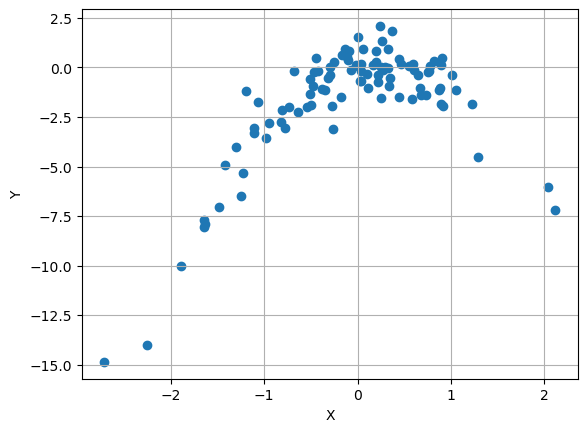

In [23]:
rng = np.random.default_rng(13)

plt.scatter(x, y)
plt.xlabel('X')
plt.ylabel('Y')
plt.grid()

x = rng.normal(size=100)
y = x - 2 * x**2 + rng.normal(size=100)
data = pd.DataFrame({'X': x, 'Y':y})

for degree in range(4):
  print(f'Mean squared error for ols with degree of {degree}: {loocv(data, degree)}')

# Obviously results are different because we are considering two separate datasets. They may have same mathematical model but there
# is always a random error factor.

(e) Which of the models in (c) had the smallest LOOCV error? Is
this what you expected? Explain your answer.

- Quadratic regression model is the best fit, it was expected as the real relationship is also quadratic. 

(f) Comment on the statistical signifcance of the coefcient estimates that results from fitting each of the models in (c) using
least squares. Do these results agree with the conclusions drawn
based on the cross-validation results?

In [24]:
for degree in range(1, 5):
  poly = PolynomialFeatures(degree)
  X_poly = poly.fit_transform(x.reshape(-1, 1))
  model = sm.OLS(y, X_poly).fit()
  print(f"\nPolynomial Degree {degree}:")
  print(model.summary())

# R^2 is highest for 4-th degree polynomial model. Excluding first model all models have constant coefficient which is
# highly outside of the bound of statistical relevance. It does agree with real model which doesn't have constant coefficient as well.
# For qubic model we can observe p-value of 3-rd power coefficent beeing to high for statistical significance. What is interesting is 
# the fact that for 4-th degree polynomial highest power coefficent has p-value of only 0.02 which means that according to theory it should
# be included despite the fact that real model doesn't have 4-th degree power.


Polynomial Degree 1:
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.210
Model:                            OLS   Adj. R-squared:                  0.202
Method:                 Least Squares   F-statistic:                     26.12
Date:                Wed, 15 Jan 2025   Prob (F-statistic):           1.59e-06
Time:                        21:26:14   Log-Likelihood:                -248.48
No. Observations:                 100   AIC:                             501.0
Df Residuals:                      98   BIC:                             506.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.9725      0.2

### 9. We will now consider the Boston housing data set, from the ISLP library.  
(a) Based on this data set, provide an estimate for the population
mean of *medv*. Call this estimate $\hat\mu$.

In [25]:
boston_df = load_data('Boston')
boston_df['medv'].mean()

22.532806324110677

(b) Provide an estimate of the standard error of $\hat\mu$. Interpret this
result.

In [26]:
print(boston_df['medv'].std())
boston_df['medv'].std() / np.sqrt(len(boston_df))

9.19710408737982


0.4088611474975351

(c) Now estimate the standard error of $\hat\mu$ using the bootstrap. How
does this compare to your answer from (b)?

In [27]:
n = 150
avg = 0
for _ in range(n):
  avg += np.random.choice(boston_df['medv'])

avg /= n
avg

22.83466666666666

(d) Based on your bootstrap estimate from (c), provide a 95 % confdence interval for the mean of medv. Compare it to the results
obtained by using Boston['medv'].std() and the two standard
error rule.


In [32]:
std = 0
n = 300
for _ in range(n):
  std += (np.random.choice(boston_df['medv']) - avg) ** 2

std = np.sqrt(std / (n - 1))
print(std, '\n')

std_err = std / np.sqrt(n)
print(std_err, '\n')

conf_interval = [avg - 2 * std_err, avg + 2 * std_err]
print(conf_interval)

# Results for standard error tend to be correct to 3rd decimal place

9.92625162631599 

0.5730924048497497 

[21.68848185696716, 23.98085147636616]


(e) Based on this data set, provide an estimate, $\hat\mu_{med}$, for the median
value of medv in the population.

In [33]:
median = boston_df['medv'].median()
median

21.2

  (f) We now would like to estimate the standard error of  $\hat\mu_{med}$. Unfortunately, there is no simple formula for computing the standard
error of the median. Instead, estimate the standard error of the
median using the bootstrap. Comment on your findings.

In [35]:
std_median = 0

for _ in range(n):
  std_median += (np.random.choice(boston_df['medv']) - median) ** 2

std_median = np.sqrt(std_median / (n - 1))

std_error_median = std_median / np.sqrt(n)

std_error_median

0.5673177124372542


(g) Based on this data set, provide an estimate for the tenth percentile of medv in Boston census tracts. Call this quantity  $\hat\mu_{0.1}$.  
(You can use the np.percentile() function.) np.
percentile() 

In [36]:
np.percentile(boston_df['medv'], 10)

12.75

(h) Use the bootstrap to estimate the standard error of  $\hat\mu_{0.1}$. Comment on your findings.

In [37]:
samples = []

for _ in range(n):
  samples.append(np.random.choice(boston_df['medv']))

np.percentile(samples, 10)

# Values are fairly similar

12.6